<a href="https://colab.research.google.com/github/lightweightcobra/Machine-Learning/blob/main/ADITYA_KUMAR_CS_IT308_LAB_8_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> IIIT Vadodara </center>
## <center> Winter 2022-23 </center>
## <center> CS/IT 308, CS 652, CS8XX Machine Learning Lab</center>
## <center> Lab#8 Neural Networks and CNN</center>

# <a>Understanding and Implementing Neural Networks from scratch</a>





## <a>1. What are Neural Networks </a>

Neural networks are a type of machine learning models which are designed to operate similar to biological neurons and human nervous system. These models are used to recognize complex patterns and relationships that exists within a labelled dataset. They have following properties:

1. The core architecture of a Neural Network model is comprised of a large number of simple processing nodes called Neurons which are interconnected and organized in different layers.

2. An individual node in a layer is connected to several other nodes in the previous and the next layer. The inputs form one layer are received and processed to generate the output which is passed to the next layer.

3. The first layer of this architecture is often named as input layer which accepts the inputs, the last layer is named as the output layer which produces the output and every other layer between input and output layer is named is hidden layers.

### Key concepts in a Neural Network

#### A. Neuron:

A Neuron is a single processing unit of a Neural Network which are connected to different other neurons in the network. These connections repersents inputs and ouputs from a neuron. To each of its connections, the neuron assigns a “weight” (W) which signifies the importance the input and adds a bias (b) term.

#### B. Activation Functions

The activation functions are used to apply non-linear transformation on input to map it to output. The aim of activation functions is to predict the right class of the target variable based on the input combination of variables. Some of the popular activation functions are Relu, Sigmoid, and TanH.

#### C. Forward Propagation

Neural Network model goes through the process called forward propagation in which it passes the computed activation outputs in the forward direction.

Z = W*X + b   
A = g(Z)

- g is the activation function
- A is the activation using the input
- W is the weight associated with the input
- B is the bias associated with the node

#### D. Error Computation:

The neural network learns by improving the values of weights and bias. The model computes the error in the predicted output in the final layer which is then used to make small adjustments the weights and bias. The adjustments are made such that the total error is minimized. Loss function measures the error in the final layer and cost function measures the total error of the network.

Loss = Actual_Value - Predicted_Value   

Cost = Summation (Loss)   

#### E. Backward Propagation:

Neural Network model undergoes the process called backpropagation in which the error is passed to backward layers so that those layers can also improve the associated values of weights and bias. It uses the algorithm called Gradient Descent in which the error is minimized and optimal values of weights and bias are obtained. This weights and bias adjustment is done by computing the derivative of error, derivative of weights, bias and subtracting them from the original values.

<br>

## <a> 2. Implement a Neural Network - Binary Classification</a>  

Lets implement a basic neural network in python for binary classification which is used to classify if a given image is 0 or 1.  

In [ ]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
import pandas as pd
import numpy as np
import keras

### 2.1 Dataset Preparation

First step is to load and prepare the dataset

In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

# include only the rows having label = 0 or 1 (binary classification)
train = train[train['label'].isin([0,1])]

# target variable
Y = train['label']

# remove the label from X
X = train.drop(columns = 'label')


### 2.2 Implementing a Activation Function

We will use sigmoid activation function because it outputs the values between 0 and 1 so its a good choice for a binary classification problem

In [ ]:
# implementing a sigmoid activation function
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s


### 2.3 Define Neural Network Architecture

Create a model with three layers - Input, Hidden, Output.

In [ ]:
def network_architecture(X, Y):
    n_x = X.shape[0]  # Number of features
    n_h = 200  # Number of nodes in the hidden layer
    n_y = 1  # Number of nodes in the output layer for binary classification
    return n_x, n_h, n_y



### 2.4 Define Neural Network Parameters

Neural Network parameters are weights and bias which we need to initialze with zero values. The first layer only contains inputs so there are no weights and bias, but the hidden layer and the output layer have a weight and bias term. (W1, b1 and W2, b2)

In [ ]:
def define_network_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.01  # Random initialization for weights
    b1 = np.zeros((n_h, 1))  # Zero initialization for bias
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}


### 2.5 Implement Forward Propagation

The hidden layer and output layer will compute the activations using sigmoid activation function and will pass it in the forward direction. While computing this activation, the input is multiplied with weight and added with bias before passing it to the function.

In [ ]:
def forward_propagation(X, params):
    W1, b1, W2, b2 = params["W1"], params["b1"], params["W2"], params["b2"]
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    return {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}

### 2.6 Compute the Network Error

To compute the cost, one straight forward approach is to compute the absolute error among prediction and actual value. But a better loss function is the log loss function which is defines as :

  -Summ ( Log (Pred) * Actual + Log (1 - Pred ) * Actual ) / m

In [ ]:
def compute_error(Predicted, Actual):
    m = Actual.shape[1]
    logprobs = np.multiply(Actual, np.log(Predicted)) + np.multiply(1 - Actual, np.log(1 - Predicted))
    cost = -np.sum(logprobs) / m
    return np.squeeze(cost)

### 2.7 Implement Backward Propagation

In backward propagation function, the error is passed backward to previous layers and the derivatives of weights and bias are computed. The weights and bias are then updated using the derivatives.  

In [ ]:
def backward_propagation(params, activations, X, Y):
    m = X.shape[1]
    A1 = activations["A1"]
    A2 = activations["A2"]
    W2 = params["W2"]
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (A1 * (1 - A1))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

def update_parameters(params, derivatives, alpha=0.01):
    params['W1'] -= alpha * derivatives["dW1"]
    params['b1'] -= alpha * derivatives["db1"]
    params['W2'] -= alpha * derivatives["dW2"]
    params['b2'] -= alpha * derivatives["db2"]
    return params

### 2.8 Compile and Train the Model

Create a function which compiles all the key functions and creates a neural network model.

In [ ]:
def neural_network(X, Y, n_h, num_iterations=1000):
    n_x, n_h, n_y = network_architecture(X, Y)
    params = define_network_parameters(n_x, n_h, n_y)
    for i in range(num_iterations):
        results = forward_propagation(X, params)
        error = compute_error(results["A2"], Y)
        derivatives = backward_propagation(params, results, X, Y)
        params = update_parameters(params, derivatives)
        if i%5 == 0:
         print(f"Iteration {i}: Loss {error}")
    return params

In [ ]:
y = Y.values.reshape(1, Y.size)
x = X.T
model = neural_network(x, y, n_h=200, num_iterations=100)

Iteration 0: Loss 0.6910887541185938
Iteration 5: Loss 0.542884042420802
Iteration 10: Loss 0.42240071574455923
Iteration 15: Loss 0.3240250768626546
Iteration 20: Loss 0.25026442696392237
Iteration 25: Loss 0.19774570382497594
Iteration 30: Loss 0.16095449280312368
Iteration 35: Loss 0.13447820087162668
Iteration 40: Loss 0.11479643013600853
Iteration 45: Loss 0.09970540064736601
Iteration 50: Loss 0.08787489585644183
Iteration 55: Loss 0.07841705989949702
Iteration 60: Loss 0.07071501676791114
Iteration 65: Loss 0.06434083732915657
Iteration 70: Loss 0.05898951146568668
Iteration 75: Loss 0.05444226522097124
Iteration 80: Loss 0.05053123244451826
Iteration 85: Loss 0.04713197170390393
Iteration 90: Loss 0.04415402186677639
Iteration 95: Loss 0.0415276533139289


### 2.9 Predictions

In [ ]:
def predict(parameters, X):
    results = forward_propagation(X, parameters)
    print (results['A2'][0])
    predictions = results['A2'][0]
    return predictions

predictions = predict(model, x)
print ('Accuracy: %d' % float((np.dot(y,predictions.T) + np.dot(1-y,1-predictions.T))/float(y.size)*100) + '%')

[0.96104031 0.03045195 0.97614997 ... 0.97649798 0.03561093 0.97631001]
Accuracy: 96%


<ipython-input-88-942ac9742376>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy: %d' % float((np.dot(y,predictions.T) + np.dot(1-y,1-predictions.T))/float(y.size)*100) + '%')


<br>

## <a>3. Implement a Neural Network - Multiclass Classification </a>

In the previous step, I discussed about how to implement a NN for binary classification in python from scratch. Python's libraries such as sklearn provides an excellent implementation of efficient neural networks which can be used to directly implement neural networks on a dataset.  In this section, lets implement a multi class neural network to classify the digit shown in an image from 0 to 9

### 3.1 Dataset Preparation

Slice the train dataset into train and validation set

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import neural_network
from sklearn import  metrics

Y = train['label']
X = train.drop(columns = 'label')
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.20, random_state=42)

### 3.2 Train the Model

Train a neural network model with 10 hidden layers.

In [ ]:
model = neural_network.MLPClassifier(
    alpha= 0.01,
    hidden_layer_sizes= (10,),
    solver= 'adam',
    random_state= 50)
model.fit(x_train, y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(10,), random_state=50)

### 3.3 Predictions

In [ ]:
predicted = model.predict(x_val)
print("Classification Report:\n %s:" % (metrics.classification_report(y_val, predicted)))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       821
           1       1.00      1.00      1.00       943

    accuracy                           1.00      1764
   macro avg       1.00      1.00      1.00      1764
weighted avg       1.00      1.00      1.00      1764
:


<br>

## <a> 4. Deep Neural Networks - Convolutional Neural Networks </a>

Deep Neural Networks are composed of complex and many number of hidden layers which tries to extract low level features from the images. Some examples of complex deep neural networks are convolutional neural networks and Recurrent Neural Networks.

###  Convolutional Neural Networks

In Convolutional Neural Networks, every image input is treated as a a matrix of pixel values which represents the amount of darkness at a given pixel in the image. Unlike, tradational neural networks which treats an image as a one dimentional network, CNNs considers the location of pixels and the neighbours for classification.

<br>

![](http://www.mdpi.com/information/information-07-00061/article_deploy/html/images/information-07-00061-g001.png)

<br>

### Key components of Convolutional Neural Network.

**A. Convolutional layer: ** In this layer, a kernel (or weight) matrix is used to extract low level features from the images. The kernel with its weights rotates over the image matrix in a sliding window fashion in order to obtained the convolved output. The kernel matrix behaves like a filter in an image extracting particular information from the original image matrix. During the colvolution process, The weights are learnt such that the loss function is minimized.

**B. Stride: ** Stride is defined as the number of steps the kernel or the weight matrix takes while moving across the entire image moving N pixel at a time. If the weight matrix moves N pixel at a time, it is called stride of N.

![](http://deeplearning.net/software/theano/_images/numerical_padding_strides.gif)
Image Credits - www.deeplearning.net

**C. Pooling Layer:**  Pooling layers are used to extract the most informative features from the generated convolved output.

![](https://upload.wikimedia.org/wikipedia/commons/e/e9/Max_pooling.png)

**D. Output Layer:** To generate the final output, a dense or a fully connected layer is applied with the softmax activation function. Softmax function is used to generate the probabilities for each class of the target variable.

<br>

## <a> 5. Implement a Convolution Neural Network </a>

### 5.1 Dataset Preparation

In the first step lets prepare the dataset and slice it into train and validation sets. For the modelling and training purpose, we can use python's library - Keras.

In [ ]:
Y = train['label']
X = train.drop(columns = 'label', axis = 1)

x_train, x_val, y_train, y_val = train_test_split(X.values, Y.values, test_size=0.10, random_state=42)

### 5.2 Define the Network Parameters

Network Parameters are :

Batch Size - Number of rows from the input data to use it one iteratation from the training purpose  
Num Classes - Total number of possible classes in the target variable  
Epochs - Total number of iterations for which cnn model will run.

In [ ]:
print(x_train.shape)
print(y_train.shape)

(7934, 784)
(7934,)


In [ ]:
# network parameters
batch_size = 64
num_classes = 10
epochs = 24

# input image dimensions
img_rows, img_cols = 28, 28

### 5.3 Preprocess the Inputs

In the preprocessing step the corresponding image data vectors are reshaped into a 4 dimentional vector : total batch size, width of the image, height of the image, and the channel. In our case, channel = 1 as we will only use single channel instead of three channels (R,G,B). The next step is to normalize the inputs by dividing them by max pixel value ie. 255.

In [ ]:
Xtest = pd.read_csv("/content/test.csv")

# preprocess the train data
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_train /= 255

# preprocess the validation data
x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
x_val = x_val.astype('float32')
x_val /= 255

input_shape = (img_rows, img_cols, 1)

# convert the target variable
y_train = keras.utils.to_categorical(y_train, 10)
y_val = keras.utils.to_categorical(y_val, 10)

# preprocess the test data
Xtest = Xtest.values.reshape(Xtest.shape[0], img_rows, img_cols, 1)
Xtest = Xtest.astype('float32')

### 5.4 Create the CNN Model Architecture

In this step, create the convolutional neural network architecture with following layers:

1. Convolutional Layer with kernel size = 3*3, 32 convolutional units, and RelU activation function
2. Convolutional Layer with kernel size = 3*3, 64 convolutional units, and RelU activation function  
3. Max Pooling Layer with pooling matrix size = 2*2
4. Dropout Layer : A dropout layer is used for regularization and reducing the overfitting
5. Flatten Layer : A layer to convert the output in one dimentional array
6. Dense Layer : A dense layer is a fully connected layer in which every node is connected to every other node in the previous and next layers. In our network, it contains 128 neurons but this number can be changed for further experiments.
7. Another Dropout Layer for regularization
8. Final output layer : A dense layer with 10 neurons for generating the output class

In the simple neural network that we implemented in step 1, the loss function was LogLoss function and the optimizing Algorithm was Gradient Descent, In this neural network, we will use categorical_crossentropy as this is a multi class classification as the loss function and Adadelta as the optimizing function.

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
model = Sequential()

# add first convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)))
# add second convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# add one max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# add one dropout layer
model.add(Dropout(0.25))
# add flatten layer
model.add(Flatten())
# add dense layer
model.add(Dense(128, activation='relu'))
# add another dropout layer
model.add(Dropout(0.5))
# add dense layer
model.add(Dense(num_classes, activation='softmax'))
# complile the model and view its architecur
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_5 (Flatten)         (None, 9216)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               1179776   
                                                      

### 5.5 Train the Model

In [ ]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_val, y_val))
accuracy = model.evaluate(x_val, y_val, verbose=0)
print('Test accuracy:', accuracy[1])

Epoch 1/24
124/124 [==============================] - 21s 162ms/step - loss: 2.2973 - accuracy: 0.1519 - val_loss: 2.2385 - val_accuracy: 0.4354
Epoch 2/24
124/124 [==============================] - 18s 146ms/step - loss: 2.1846 - accuracy: 0.4837 - val_loss: 2.1052 - val_accuracy: 0.9762
Epoch 3/24
124/124 [==============================] - 18s 146ms/step - loss: 2.0392 - accuracy: 0.8251 - val_loss: 1.9282 - val_accuracy: 0.9943
Epoch 4/24
124/124 [==============================] - 19s 155ms/step - loss: 1.8405 - accuracy: 0.9493 - val_loss: 1.6909 - val_accuracy: 0.9932
Epoch 5/24
124/124 [==============================] - 18s 144ms/step - loss: 1.5724 - accuracy: 0.9655 - val_loss: 1.3768 - val_accuracy: 0.9955
Epoch 6/24
124/124 [==============================] - 19s 152ms/step - loss: 1.2456 - accuracy: 0.9723 - val_loss: 1.0182 - val_accuracy: 0.9932
Epoch 7/24
124/124 [==============================] - 19s 152ms/step - loss: 0.9132 - accuracy: 0.9808 - val_loss: 0.6941 - val_ac

### 5.6 Generate Predictions

In [ ]:
pred = model.predict(Xtest)
y_classes = pred.argmax(axis=-1)
res = pd.DataFrame()
res['ImageId'] = list(range(1,28001))
res['Label'] = y_classes
res.to_csv("output.csv", index = False)

875/875 [==============================] - 17s 20ms/step


# Make a submission to : https://www.kaggle.com/competitions/digit-recognizer

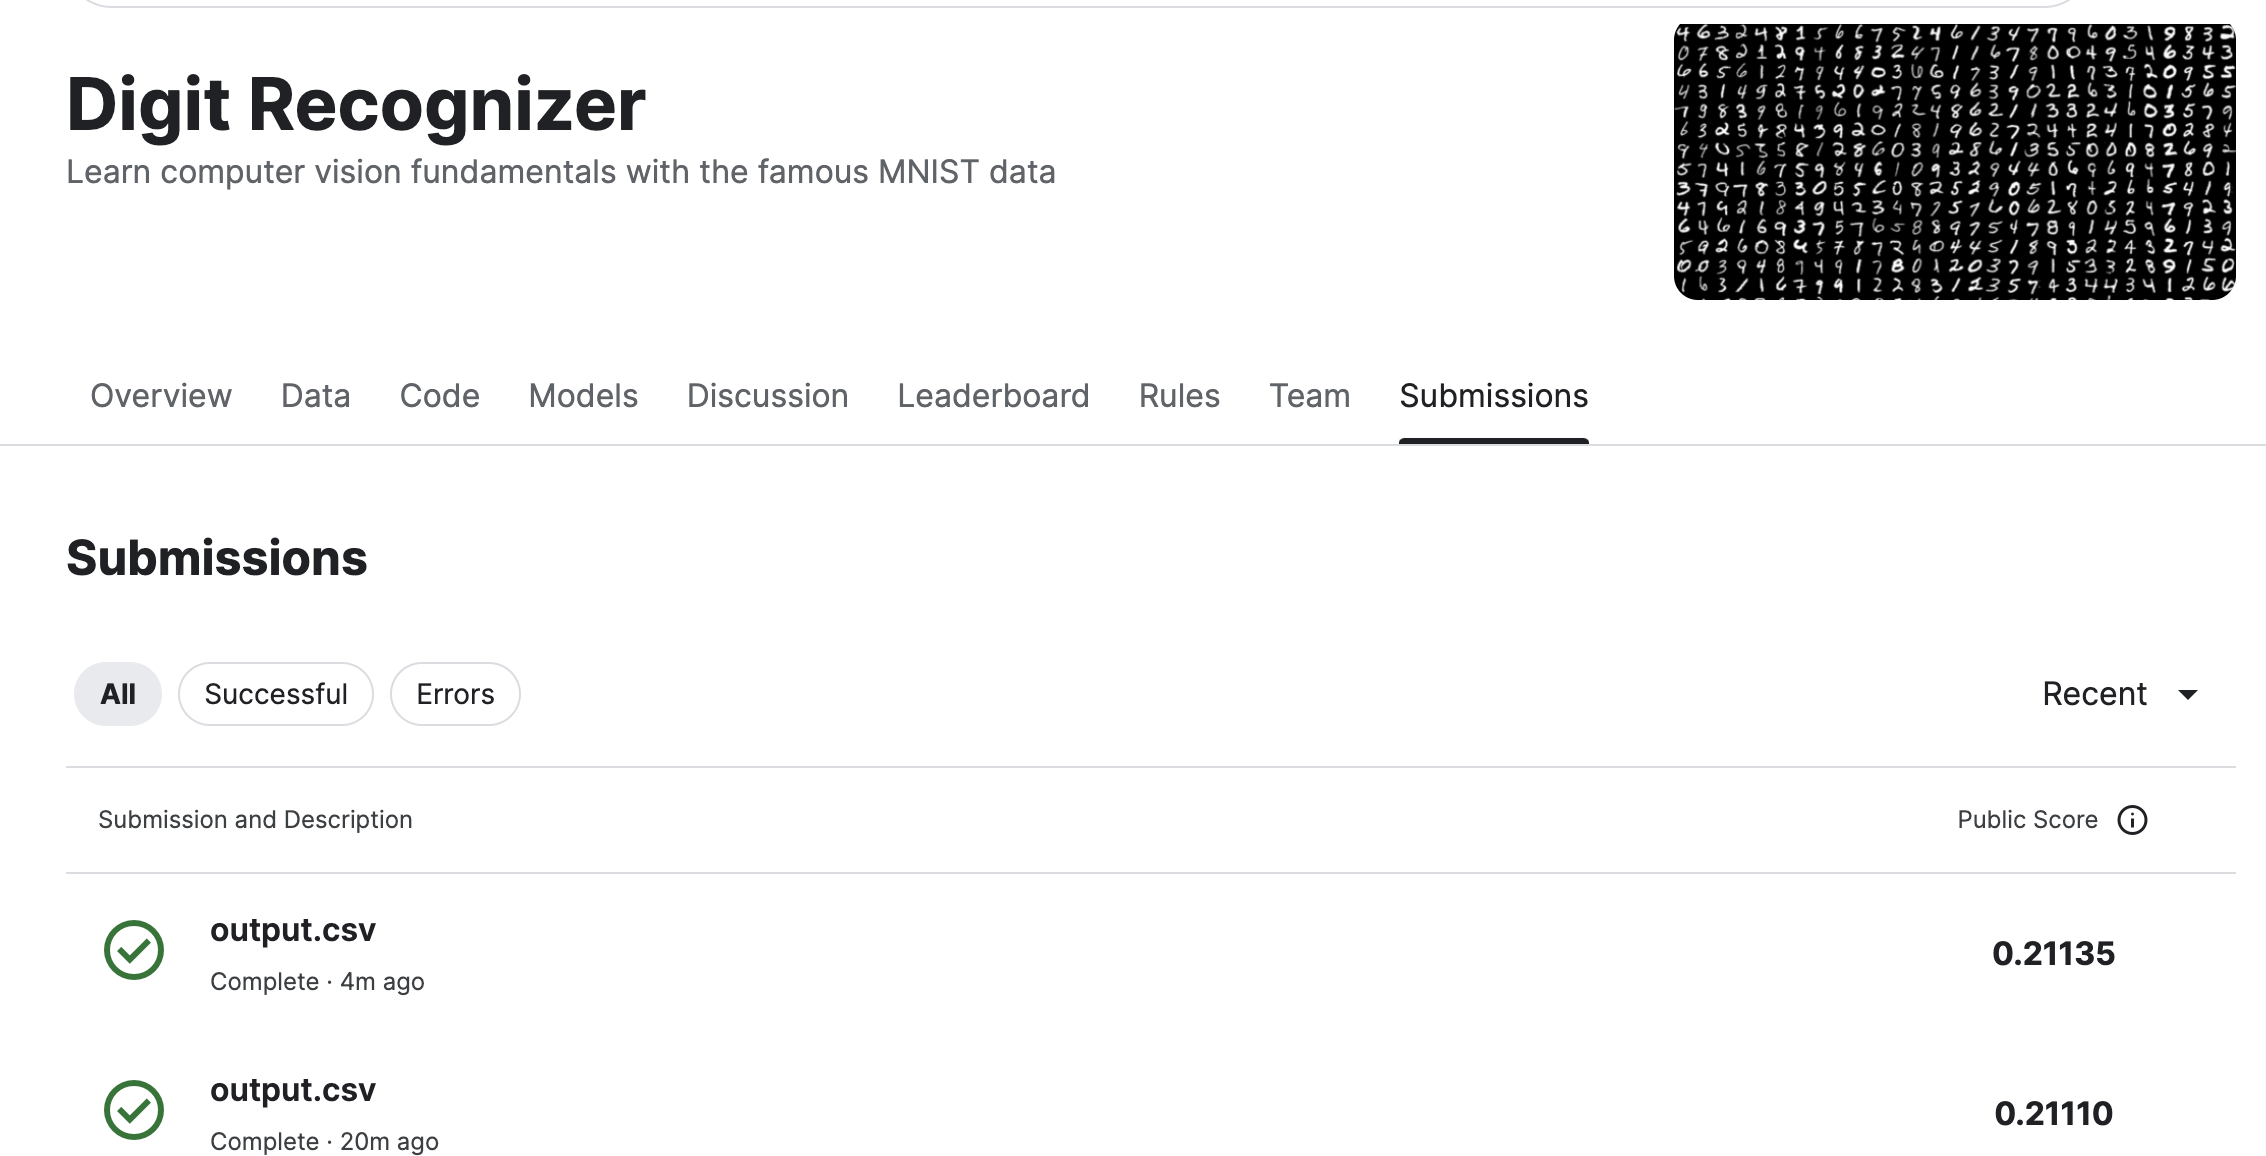